# Import necessary libraries

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [188]:
df= pd.read_csv("C:/Users/Dell/JupyterPythoncodes/ApoorvaKhare_OasisInfobyte_Tasks/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Row and Column count

In [189]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  301
Number of columns are:  9


# Information

In [190]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Missing/Null values

In [191]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [192]:
df.duplicated().sum()

2

In [193]:
df.drop_duplicates(inplace=True)

Insights
* The car dataset consists of Cars Name, Price details, No. of Owner etc. of different cars.
* There are 301 rows and 9 columns provided in the data.
* 2 duplicate rows present in the dataset.
* Null values not exist in the dataset

In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.566332,0.32,1.20,6.10,9.84,92.6
Driven_kms,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


In [195]:
df.Car_Name.nunique()

98

In [196]:
df.Year.unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [197]:
df.Owner.unique()

array([0, 1, 3], dtype=int64)

In [198]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [199]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [200]:
df.Selling_type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [201]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

# Calculating age of the model

In [202]:
df['Age'] = 2024 - df['Year']

In [203]:
# # drop df as it is no longer needed
# df.drop('Year', inplace = True, axis = 1 )

In [204]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


# Top 10 Selling Cars

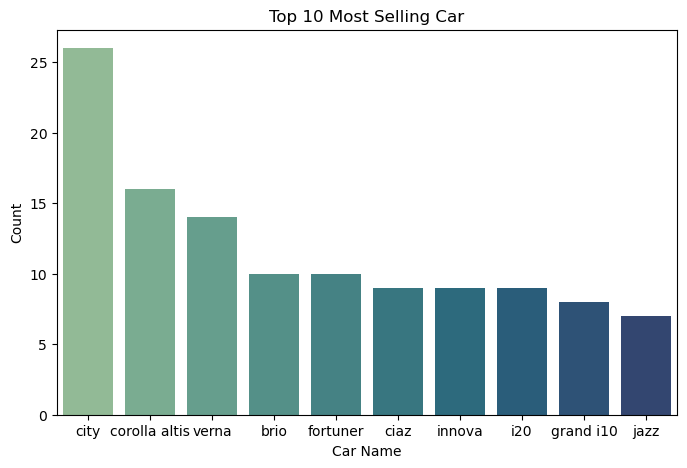

In [205]:
# Chart - 1 Count plot visualization code for top 10 most selling car
# Count the occurrences of each unique car name in the 'Car_Name' column and take the top 10 most selling car
top10 = df['Car_Name'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Name', data=df, order=top10.index, palette='crest')

# Set labels and title for the plot
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Variation of selling price with Age of Car')

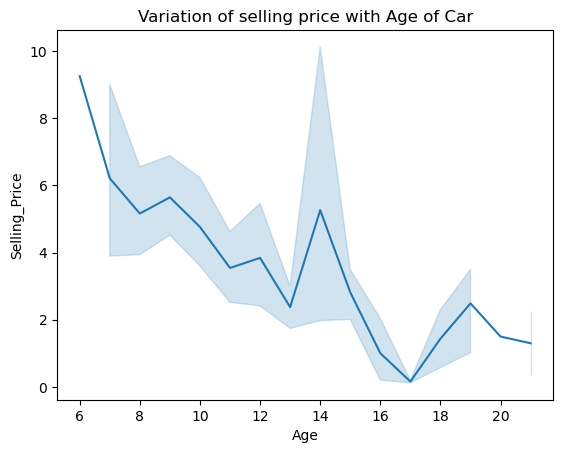

In [206]:
sns.lineplot(x='Age', y='Selling_Price', data=df).set_title('Variation of selling price with Age of Car')

### Insights

As we can see the from the above lineplot that the Selling Price of the car decreases with its age

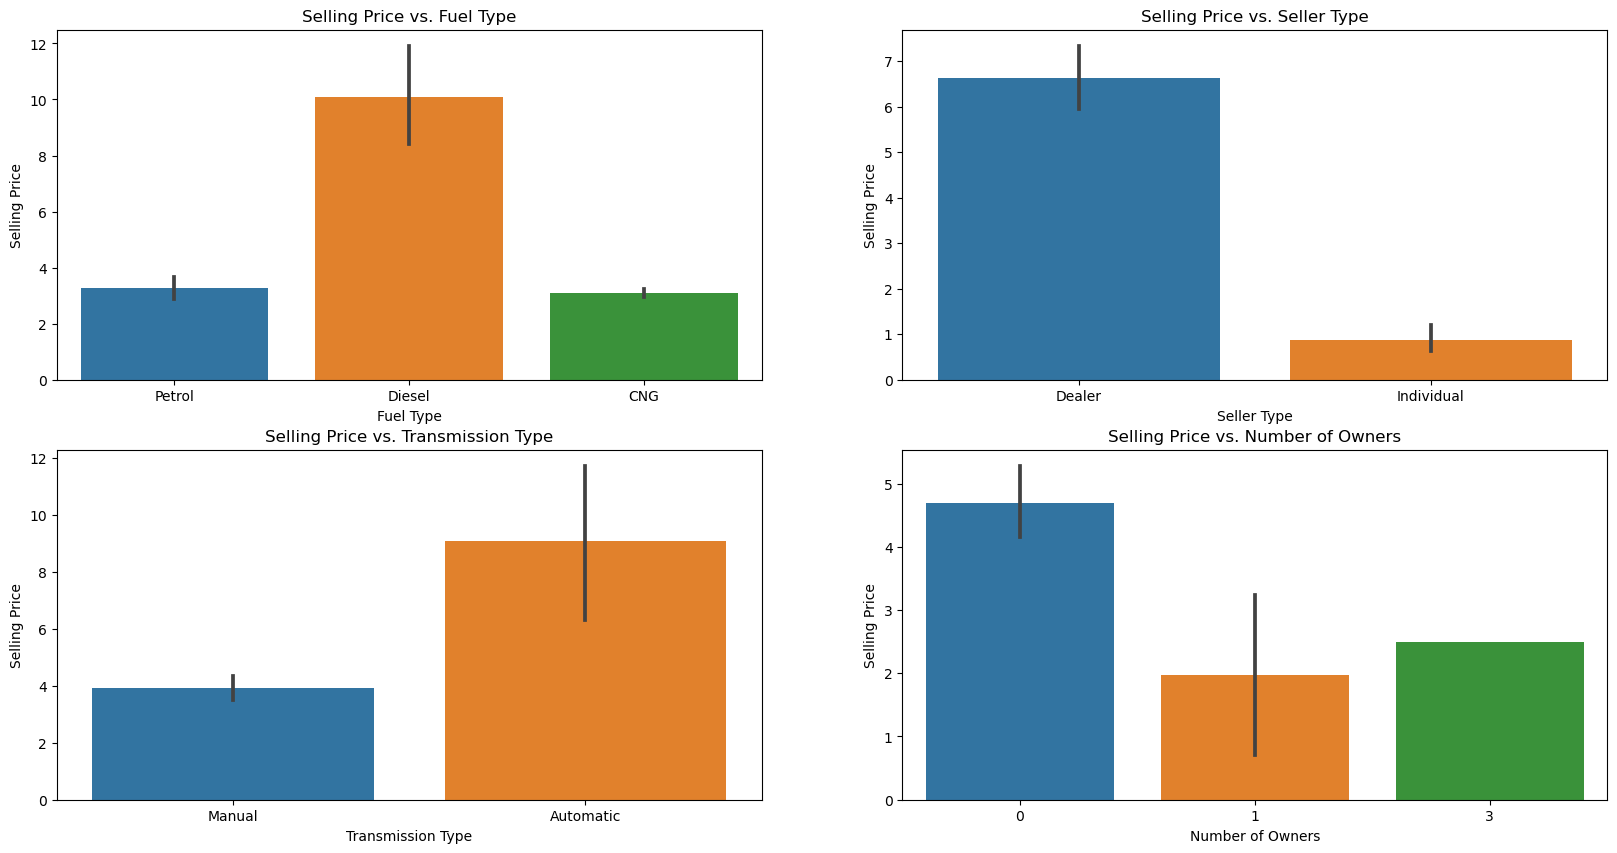

In [207]:
# Chart - 4 Barplot visualization code for categorical variable vs target variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Barplot for Selling_Price vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type')

# Subplot 2: Barplot for Selling_Price vs. Seller_Type
plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Seller Type')

# Subplot 3: Barplot for Selling_Price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Transmission Type')

# Subplot 4: Barplot for Selling_Price vs. Owner
plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Selling_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Number of Owners')

# Display the plot
plt.show()

### Insight(s) found from the chart?
From the above plots we can analyse that:

* The cars with 'Fuel_Type' Diesel has a higher 'Selling_Price' compared to the rest and at the same time cars running on Petrol and CNG are costs less and almost same.
* The cars sold by the 'Seller_Type' Dealers have a higher range whereas Individual sellers cost low.
* The cars with Automatic 'Transmission' costs more than the cars with Manual Transmission.
* First Owner cars holds a higher value in terms of 'Selling_Price' whereas we can also observe that the 'Selling_Price' reduces with an increase in the number of 'Owner'.

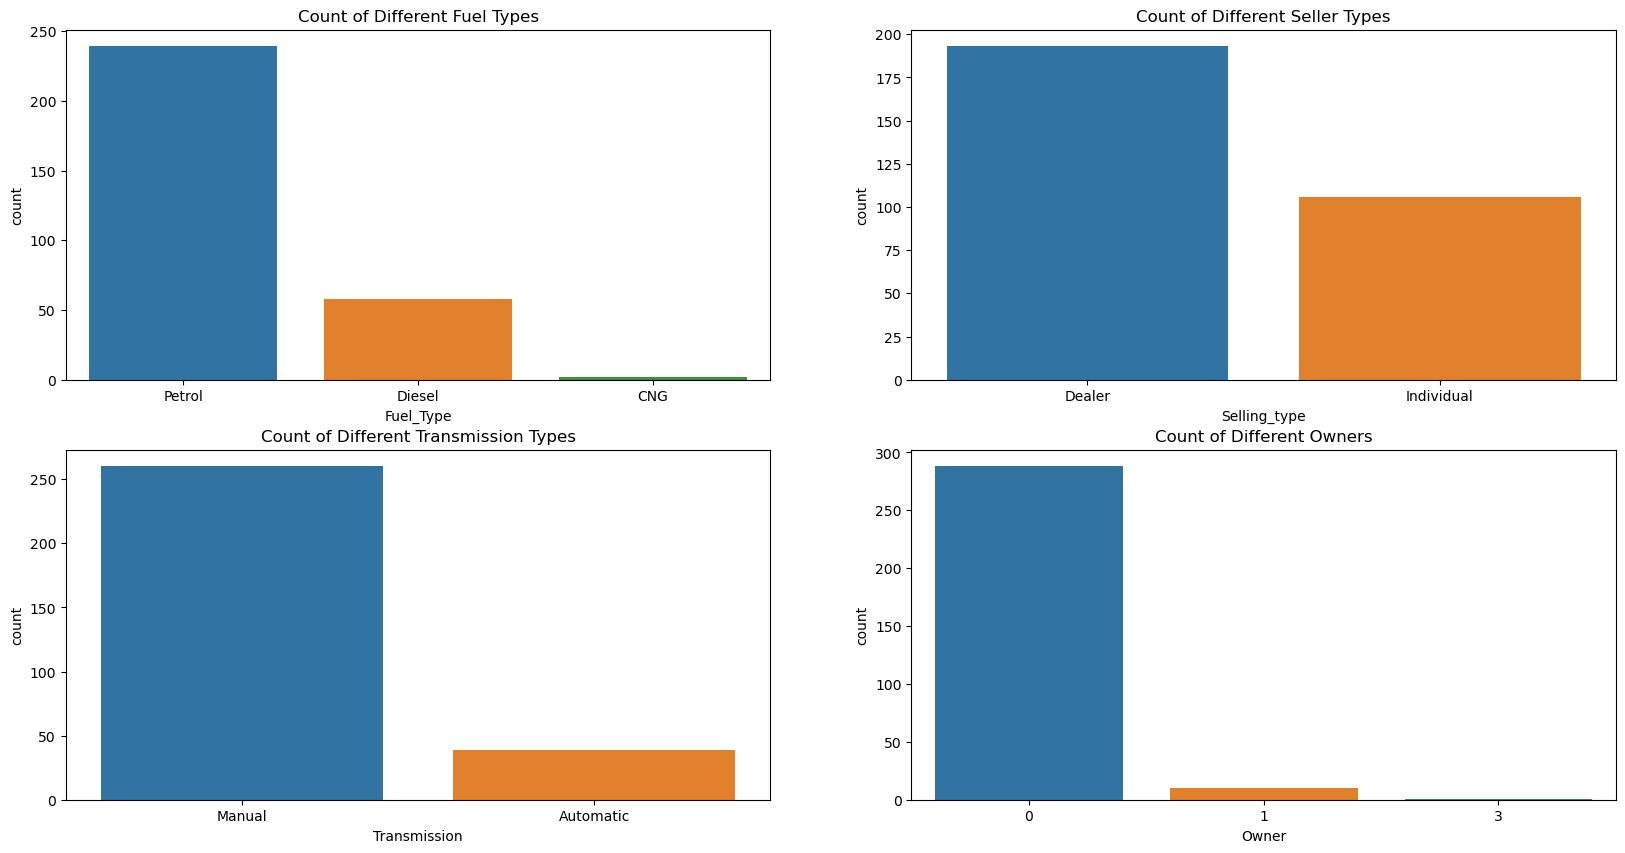

In [208]:
# Chart - 3 Count plot visualization code for Categorical Variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Count of different Fuel Types
plt.subplot(2,2,1)
sns.countplot(data=df, x = 'Fuel_Type')
plt.title("Count of Different Fuel Types")

# Subplot 2: Count of different Seller Types
plt.subplot(2,2,2)
sns.countplot(data=df, x = 'Selling_type')
plt.title("Count of Different Seller Types")

# Subplot 3: Count of different Transmission Types
plt.subplot(2,2,3)
sns.countplot(data=df, x = 'Transmission')
plt.title("Count of Different Transmission Types")

# Subplot 4: Count of different Owners
plt.subplot(2,2,4)
sns.countplot(data=df, x = 'Owner')
plt.title("Count of Different Owners")

# Display the plot
plt.show()

### What is/are the insight(s) found from the chart?
 
From the above plots we can analyse that:

* The number of cars having their 'Fuel_Type' type as Petrol is greater when compared to the other types namely: Diesel and CNG.
* We can observe that most of the cars are sold through Dealers when compared to the Individual sellers.
* We clearly see that Manual cars are much more in number when compared to Automatic cars.
* Most of the cars are sold by the First Owners and negligible number of cars are sold by the Third or Fourth Owners.

# Correlation Heatmap

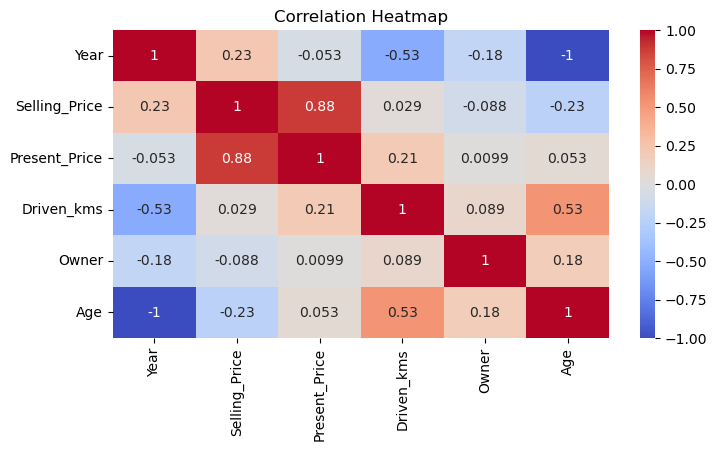

In [209]:
# Correlation Heatmap visualization code
numeric_cols = df[['Year','Selling_Price', 'Present_Price', 'Driven_kms', 'Owner','Age']]
plt.figure(figsize=(8, 4))
sns.heatmap(data=numeric_cols.corr(), annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

### Insight(s)

From the above correlation heatmap we get to know that, Present price and selling price are positively highly correlated, as 'Present_Price' is likely one of the significant factors that influence the 'Selling_Price' of a car.
And 'Age' and 'Selling Price' & 'Owner' and 'Selling Price' are negatively highly correlated.

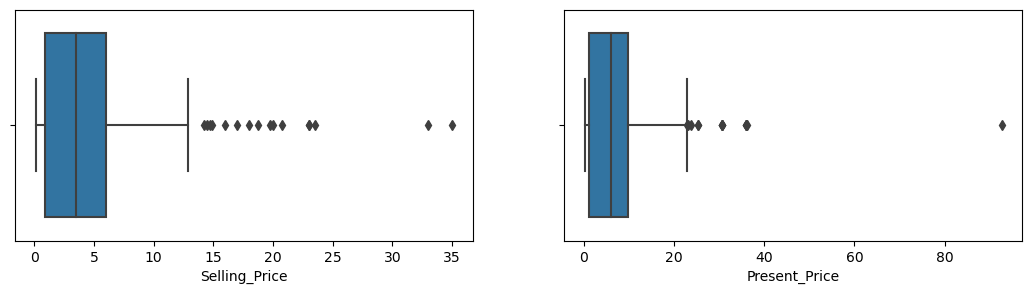

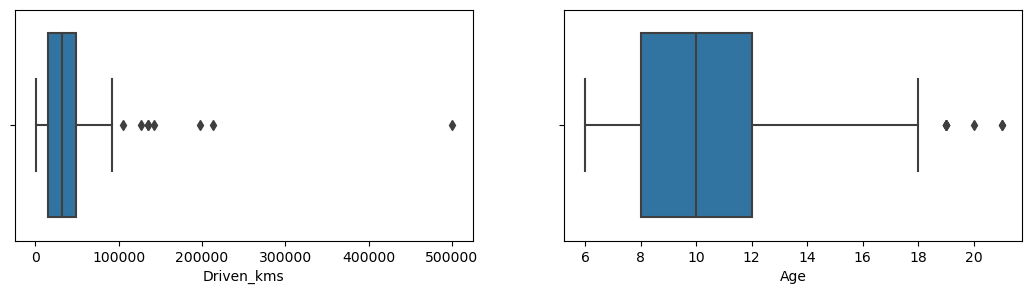

In [210]:
num_cols = ['Selling_Price','Present_Price','Driven_kms','Age','Owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

###  Insights

As we can see from the above boxplot that the Selling Price, Present Price, Driven_kms and Age have outliers. 

In [211]:
# Handling Outliers & Outlier treatments
# Removing outliers by Using IQR method:
q1, median, q3 = df.Selling_Price.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Selling_Price'] = np.where(df['Selling_Price'] > upper_limit, median,np.where(df['Selling_Price'] < lower_limit,median,df['Selling_Price']))

# Removing outliers by Capping:
for col in ['Present_Price','Driven_kms','Owner','Age']:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

Here i used IQR method and Capping method, Based on IQR method I set Upper limit and Lower limit of Selling Price and convert those outliers into median values.

Also i have capp outliers upto 99th percentile and above that I converted those outliers into upper limit value.

In [212]:
from sklearn.preprocessing import LabelEncoder

# Select the required columns
cat_columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
df1 = df[cat_columns].copy()

# Initialise the training data
label_encoders = {col: LabelEncoder().fit(df[col]) for col in cat_columns}

# Encode the training data
df_encoded = df[cat_columns].apply(lambda col: label_encoders[col.name].transform(col))
# Check the encoded Data Frame
print(df_encoded.head())

   Car_Name  Fuel_Type  Selling_type  Transmission
0        90          2             0             1
1        93          1             0             1
2        68          2             0             1
3        96          2             0             1
4        92          1             0             1


In [213]:
df2 = df.drop(columns = cat_columns)
df2

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Age
0,2014,3.35,5.59,27000.0,0.0,10.0
1,2013,4.75,9.54,43000.0,0.0,11.0
2,2017,7.25,9.85,6900.0,0.0,7.0
3,2011,2.85,4.15,5200.0,0.0,13.0
4,2014,4.60,6.87,42450.0,0.0,10.0
...,...,...,...,...,...,...
296,2016,6.00,11.60,33988.0,0.0,8.0
297,2015,4.00,5.90,60000.0,0.0,9.0
298,2009,3.35,11.00,87934.0,0.0,15.0
299,2017,6.00,12.50,9000.0,0.0,7.0


In [214]:
df3 = pd.concat([df2, df_encoded], axis = 1)
df3.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Age,Car_Name,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000.0,0.0,10.0,90,2,0,1
1,2013,4.75,9.54,43000.0,0.0,11.0,93,1,0,1
2,2017,7.25,9.85,6900.0,0.0,7.0,68,2,0,1
3,2011,2.85,4.15,5200.0,0.0,13.0,96,2,0,1
4,2014,4.60,6.87,42450.0,0.0,10.0,92,1,0,1


In [215]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           299 non-null    int64  
 1   Selling_Price  299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Driven_kms     299 non-null    float64
 4   Owner          299 non-null    float64
 5   Age            299 non-null    float64
 6   Car_Name       299 non-null    int32  
 7   Fuel_Type      299 non-null    int32  
 8   Selling_type   299 non-null    int32  
 9   Transmission   299 non-null    int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 21.0 KB


In [216]:
df3['Owner'] = df3['Owner'].apply(np.int64)
df3['Driven_kms'] = df3['Driven_kms'].apply(np.int64)
df3['Age'] = df3['Age'].apply(np.int64)
df3.drop(columns='Age',inplace = True)

In [217]:
df3.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,0,90,2,0,1
1,2013,4.75,9.54,43000,0,93,1,0,1
2,2017,7.25,9.85,6900,0,68,2,0,1
3,2011,2.85,4.15,5200,0,96,2,0,1
4,2014,4.60,6.87,42450,0,92,1,0,1


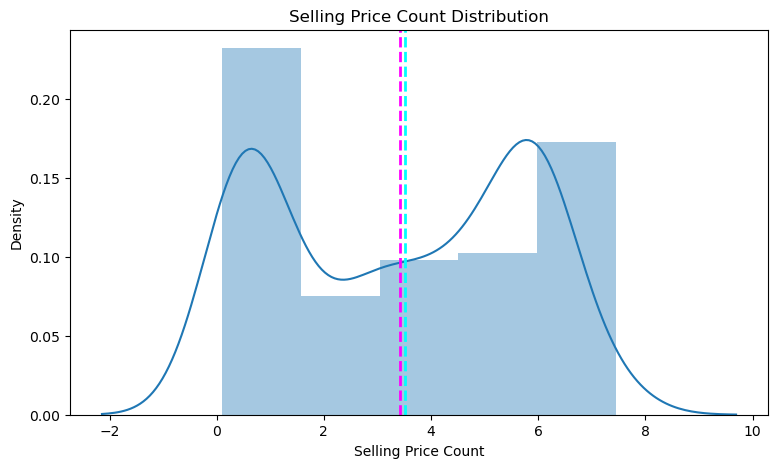

In [218]:
# Visualizing the distribution of the dependent variable - Selling Price
# Defining dependent variable
dependent_variable = ['Selling_Price']

plt.figure(figsize=(9,5))
sns.distplot(df3[dependent_variable])
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')
plt.axvline(df3[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df3[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [219]:
# Skew of the dependent variable
df3[dependent_variable].skew()

Selling_Price   -0.05905
dtype: float64

### Insights from the above distplot

* A skewness value of -0.05905 indicates that the distribution is only very slightly negatively skewed, meaning it is close to symmetric so the transformation is likely not needed.

# Train/Test Splitting

In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

 # Separate fatures and target variable
X = df3.drop(columns = ['Selling_Price'])
y = df3['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [221]:
print(X.shape)
print(y.shape)

(299, 8)
(299,)


In [222]:
# Standardize the features with StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

##### I will be using the following models:

* Linear Regressor
* Decision Tree Regressor
* Support Vector Regressor
* Random Forest Regressor
* GradientBoostingRegressor
* MLP Regressor

In [223]:
model=LinearRegression()
model.fit(X_train_s,y_train)
y_pred_lr = model.predict(X_test_s)

test_mse= mean_squared_error(y_test, y_pred_lr)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred_lr)
test_r2= r2_score(y_test, y_pred_lr)

metrics_test={"Data": "Test Data",
       "R2_score":test_r2,
       "Mean_squared_error":test_mse,
       "Root_mean_squared_error":test_rmse,
       "Mean_absolute_error":test_mae
          }

print(metrics_test)
print("")

{'Data': 'Test Data', 'R2_score': 0.8819497212356586, 'Mean_squared_error': 0.6612813906896903, 'Root_mean_squared_error': 0.8131920995002905, 'Mean_absolute_error': 0.6023313584484343}



In [224]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_s,y_train)
y_pred_dtr = dtr.predict(X_test_s)

test_mse= mean_squared_error(y_test, y_pred_dtr)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred_dtr)
test_r2= r2_score(y_test, y_pred_dtr)

metrics_test={"Data": "Test Data",
       "R2_score":test_r2,
       "Mean_squared_error":test_mse,
       "Root_mean_squared_error":test_rmse,
       "Mean_absolute_error":test_mae
          }

print(metrics_test)
print("")

{'Data': 'Test Data', 'R2_score': 0.865666796285224, 'Mean_squared_error': 0.7524933333333335, 'Root_mean_squared_error': 0.8674637360335782, 'Mean_absolute_error': 0.4973333333333334}



In [225]:
model = SVR(kernel = 'rbf', C = 1.0, epsilon = 0.2)
model.fit(X_train_s, y_train)
y_pred_svr = model.predict(X_test_s)

test_mse= mean_squared_error(y_test, y_pred_svr)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred_svr)
test_r2= r2_score(y_test, y_pred_svr)

metrics_test={"Data": "Test Data",
       "R2_score":test_r2,
       "Mean_squared_error":test_mse,
       "Root_mean_squared_error":test_rmse,
       "Mean_absolute_error":test_mae
          }

print(metrics_test)
print("")

{'Data': 'Test Data', 'R2_score': 0.93282535365861, 'Mean_squared_error': 0.37629172939437827, 'Root_mean_squared_error': 0.6134262216390641, 'Mean_absolute_error': 0.4497787149230737}



In [226]:
model = RandomForestRegressor(n_estimators=500,n_jobs= -1 ,random_state=42)
model.fit(X_train_s, y_train)
y_pred_rfr = model.predict(X_test_s)

test_mse= mean_squared_error(y_test, y_pred_rfr)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred_rfr)
test_r2= r2_score(y_test, y_pred_rfr)

metrics_test={"Data": "Test Data",
       "R2_score":test_r2,
       "Mean_squared_error":test_mse,
       "Root_mean_squared_error":test_rmse,
       "Mean_absolute_error":test_mae
          }

print(metrics_test)
print("")

{'Data': 'Test Data', 'R2_score': 0.9396744830628808, 'Mean_squared_error': 0.337925010866663, 'Root_mean_squared_error': 0.5813131779571687, 'Mean_absolute_error': 0.36303866666666434}



In [227]:
model = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1)
model.fit(X_train_s, y_train)
y_pred_gbr = model.predict(X_test_s)

test_mse= mean_squared_error(y_test, y_pred_gbr)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred_gbr)
test_r2= r2_score(y_test, y_pred_gbr)

metrics_test={"Data": "Test Data",
       "R2_score":test_r2,
       "Mean_squared_error":test_mse,
       "Root_mean_squared_error":test_rmse,
       "Mean_absolute_error":test_mae
          }

print(metrics_test)
print("")

{'Data': 'Test Data', 'R2_score': 0.93344889883769, 'Mean_squared_error': 0.3727988208854285, 'Root_mean_squared_error': 0.6105725353186372, 'Mean_absolute_error': 0.37084039863500295}



In [238]:
model = MLPRegressor(hidden_layer_sizes=(100,),max_iter = 1000,random_state = 42)
model.fit(X_train_s,y_train)
y_pred_mlpr = model.predict(X_test_s)

test_mse= mean_squared_error(y_test, y_pred_mlpr)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred_mlpr)
test_r2= r2_score(y_test, y_pred_mlpr)

metrics_test={"Data": "Test Data",
       "R2_score":test_r2,
       "Mean_squared_error":test_mse,
       "Root_mean_squared_error":test_rmse,
       "Mean_absolute_error":test_mae
          }

print(metrics_test)
print("")

{'Data': 'Test Data', 'R2_score': 0.9534862744727579, 'Mean_squared_error': 0.2605555990614417, 'Root_mean_squared_error': 0.5104464703193095, 'Mean_absolute_error': 0.3783586534686619}



In [239]:
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": y_pred_lr,
    "Decision Tree Regressor": y_pred_dtr,
    "Support Vector Regressor": y_pred_svr,
    "Random Forest Regressor": y_pred_rfr,
    "Gradient Boosting Regressor": y_pred_gbr,
    "MLP Regressor": y_pred_mlpr
}
mse_scores = {}
r2_scores = {}
for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Storing metrics in dictionaries
    mse_scores[model_name] = mse
    r2_scores[model_name] = r2
    
    # Print metrics
    print(f"{model_name}:")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)
    print("")

Linear Regression:
Mean Squared Error: 0.6612813906896903
R2 Score: 0.8819497212356586

Decision Tree Regressor:
Mean Squared Error: 0.7524933333333335
R2 Score: 0.865666796285224

Support Vector Regressor:
Mean Squared Error: 0.37629172939437827
R2 Score: 0.93282535365861

Random Forest Regressor:
Mean Squared Error: 0.337925010866663
R2 Score: 0.9396744830628808

Gradient Boosting Regressor:
Mean Squared Error: 0.3727988208854285
R2 Score: 0.93344889883769

MLP Regressor:
Mean Squared Error: 0.2605555990614417
R2 Score: 0.9534862744727579



## Visualization of Actual value and the Selling Price predicted by the different models

<Axes: xlabel='Selling_Price', ylabel='Density'>

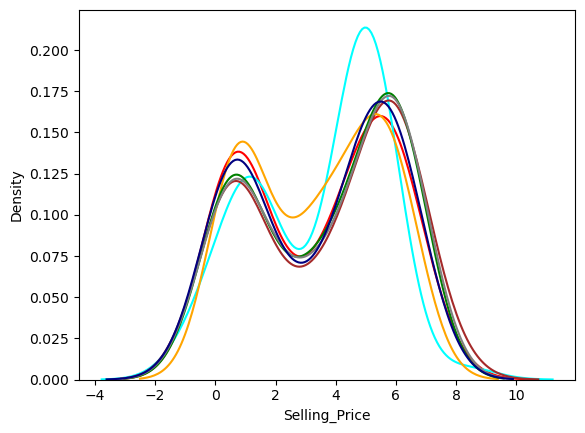

In [240]:
ax = sns.kdeplot(y_test, color='r', label='Actual')

# Predicted 

# Linear Regressor
sns.kdeplot(y_pred_lr, color='cyan', label='Predicted', ax=ax)

# Decision Tree Regressor
sns.kdeplot(y_pred_dtr, color='brown', label='Predicted', ax=ax)

# SV Regressor
sns.kdeplot(y_pred_svr, color='orange', label='Predicted', ax=ax)

# Random forest regressor
sns.kdeplot(y_pred_rfr, color='green', label='Predicted', ax=ax)

# Gradient Boosting Regressor
sns.kdeplot(y_pred_gbr, color='grey', label='Predicted', ax=ax)

# MLP Regressor
sns.kdeplot(y_pred_mlpr, color='navy', label='Predicted', ax=ax) # Multi layer Perceptron Regressor is almost coinciding with the actual value




From the above plot we can see that the values predicted by Multilayer Perceptron Regressor(shown by navy color) is almost coinciding wih the actual value(shown by red color) so we can use that model to predict the price of the car

In [241]:
import pickle
# Save the model to a pickle file
with open("mlp_regressor.pkl", "wb") as f:
    pickle.dump(model, f)